In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [64]:
# Remplacez 'votre_fichier.csv' par le chemin réel de votre fichier CSV.
df_btc = pd.read_csv('../CSV/BTC.csv', parse_dates=['Date'])
df_sp500 = pd.read_csv('../CSV/S&P500.csv', parse_dates=['Date'])
df_gold = pd.read_csv('../CSV/XAU(GOLD).csv', parse_dates=['Date'])

# Facultatif : mettre la date en index
df_btc.set_index('Date', inplace=True)
df_sp500.set_index('Date', inplace=True)
df_gold.set_index('Date', inplace=True)


In [65]:
print("Statistiques descriptives pour BTC :")
print(df_btc.describe())

print("\nStatistiques descriptives pour S&P500 :")
print(df_sp500.describe())

print("\nStatistiques descriptives pour GOLD :")
print(df_gold.describe())


Statistiques descriptives pour BTC :
          Close/Last  Volume           Open          High            Low
count    1883.000000     0.0    1883.000000    1883.00000    1883.000000
mean    34040.240998     NaN   34020.393840   34367.86240   33718.551832
std     24396.582505     NaN   24382.936974   24605.04472   24179.405908
min      3864.900000     NaN    3864.600000    3894.70000    3810.700000
25%     11361.600000     NaN   11368.050000   11408.80000   11229.700000
50%     28285.600000     NaN   28203.900000   28460.30000   28109.200000
75%     50395.100000     NaN   50709.850000   51436.25000   49898.250000
max    106484.000000     NaN  106504.000000  106961.00000  105686.000000

Statistiques descriptives pour S&P500 :
        Close/Last         Open         High          Low
count  2522.000000  2522.000000  2522.000000  2522.000000
mean   3392.310508  3386.074453  3403.992284  3366.780682
std    1107.371794  1119.270700  1124.861992  1113.499700
min    1829.080000     0.000000  

In [66]:
df_btc.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2025-02-09,96852.7,NaN,96218.7,97297.8,96369.0
2025-02-08,96623.3,NaN,95981.2,96862.8,95716.1
2025-02-07,96402.1,NaN,97460.6,96862.8,96237.1
2025-02-06,97467.5,NaN,97623.4,97872.2,96424.2
2025-02-05,97631.2,NaN,98042.5,97824.0,96510.6


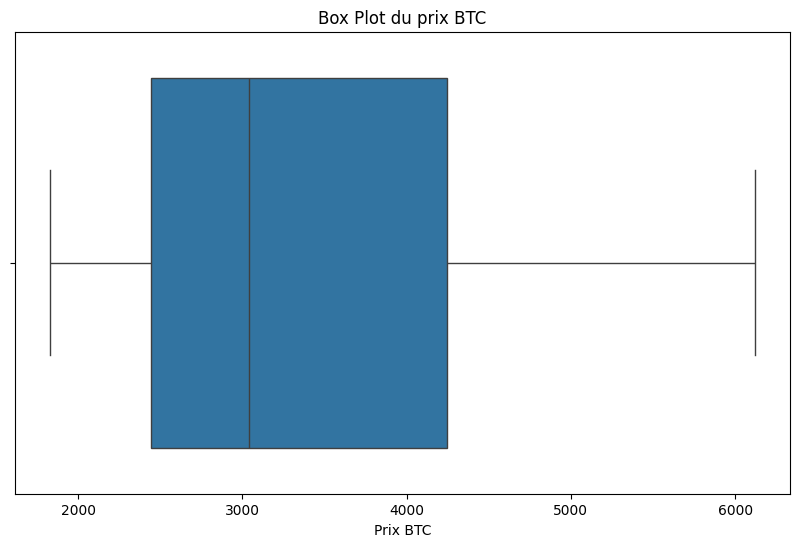

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_sp500['Close/Last'])
plt.title("Box Plot du prix BTC")
plt.xlabel("Prix BTC")
plt.show()


La colonne Volume est vide après suppression des NaN. Box plot ignoré.


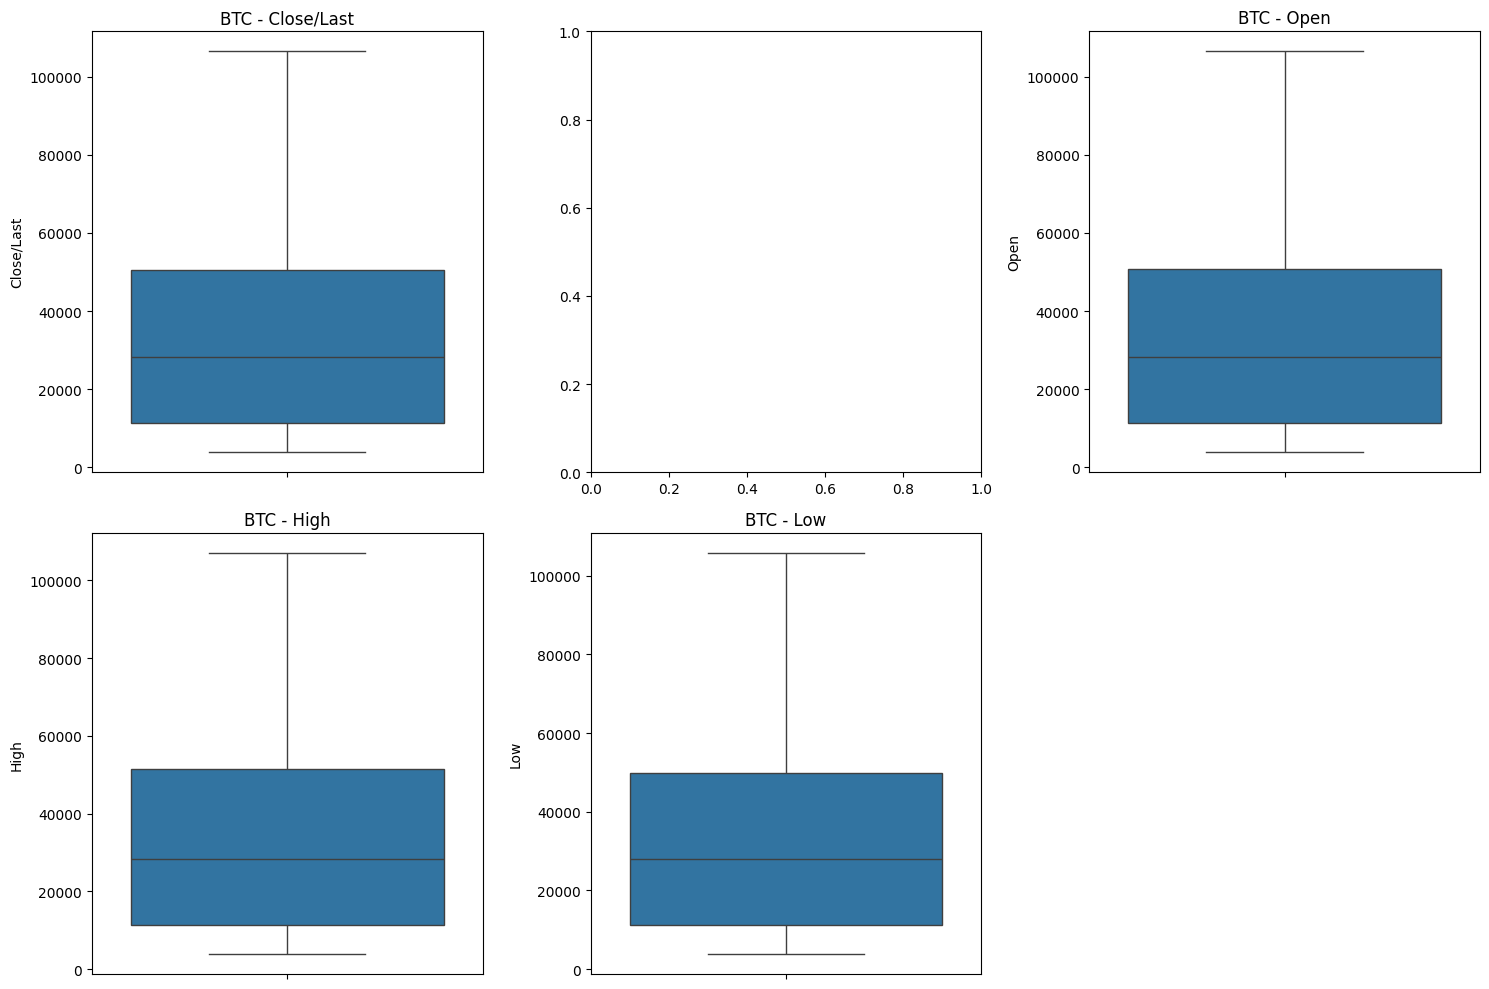

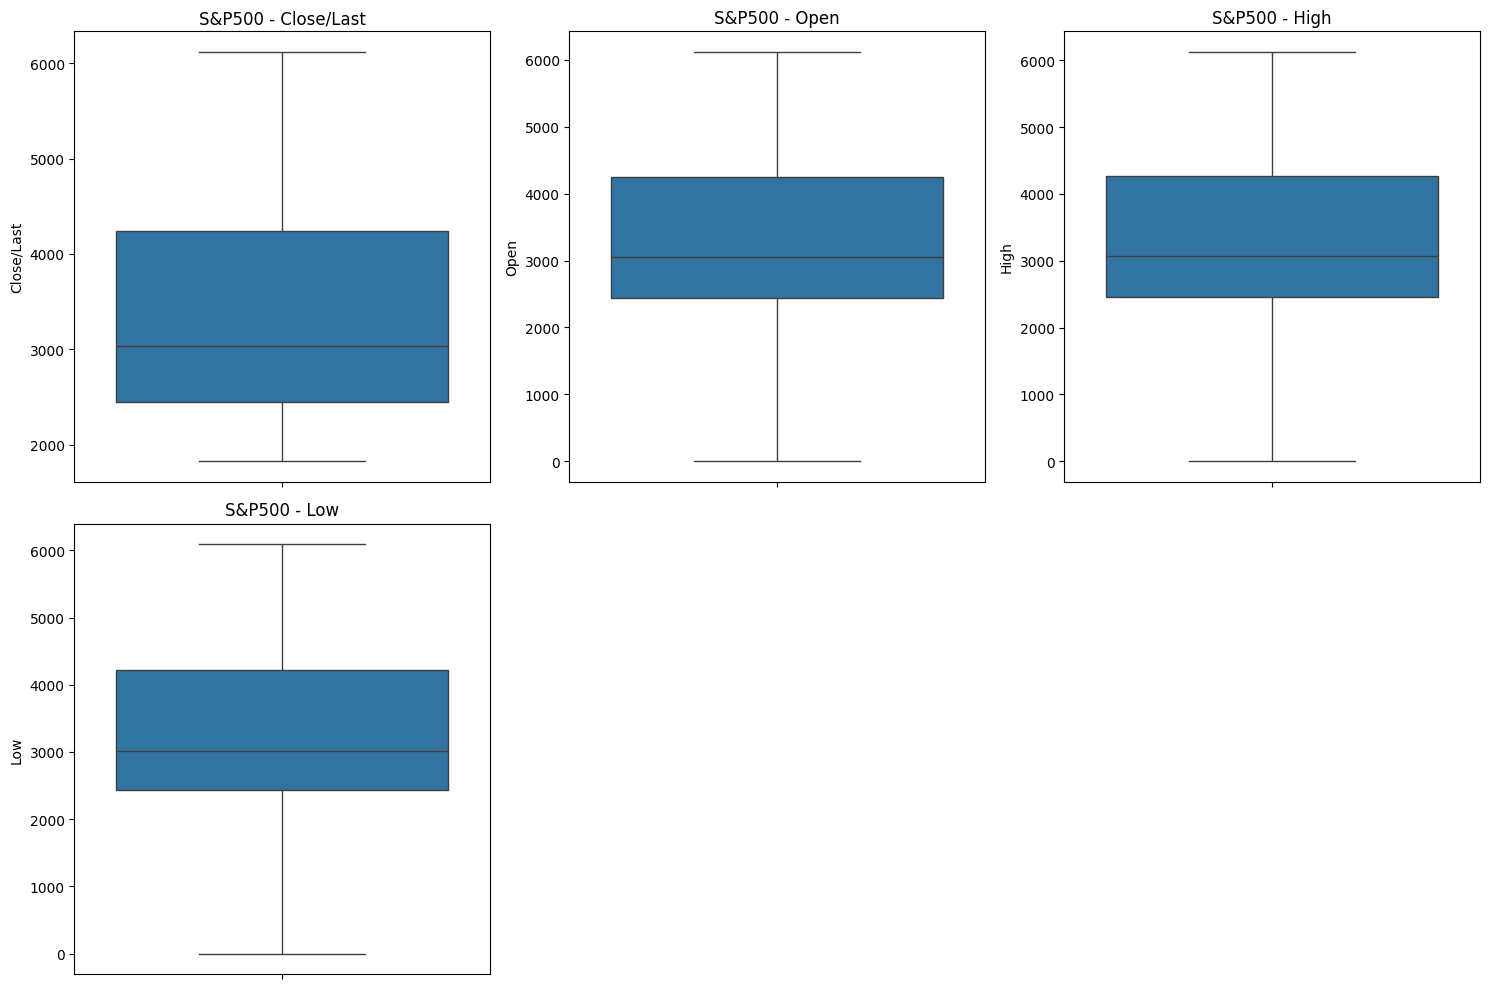

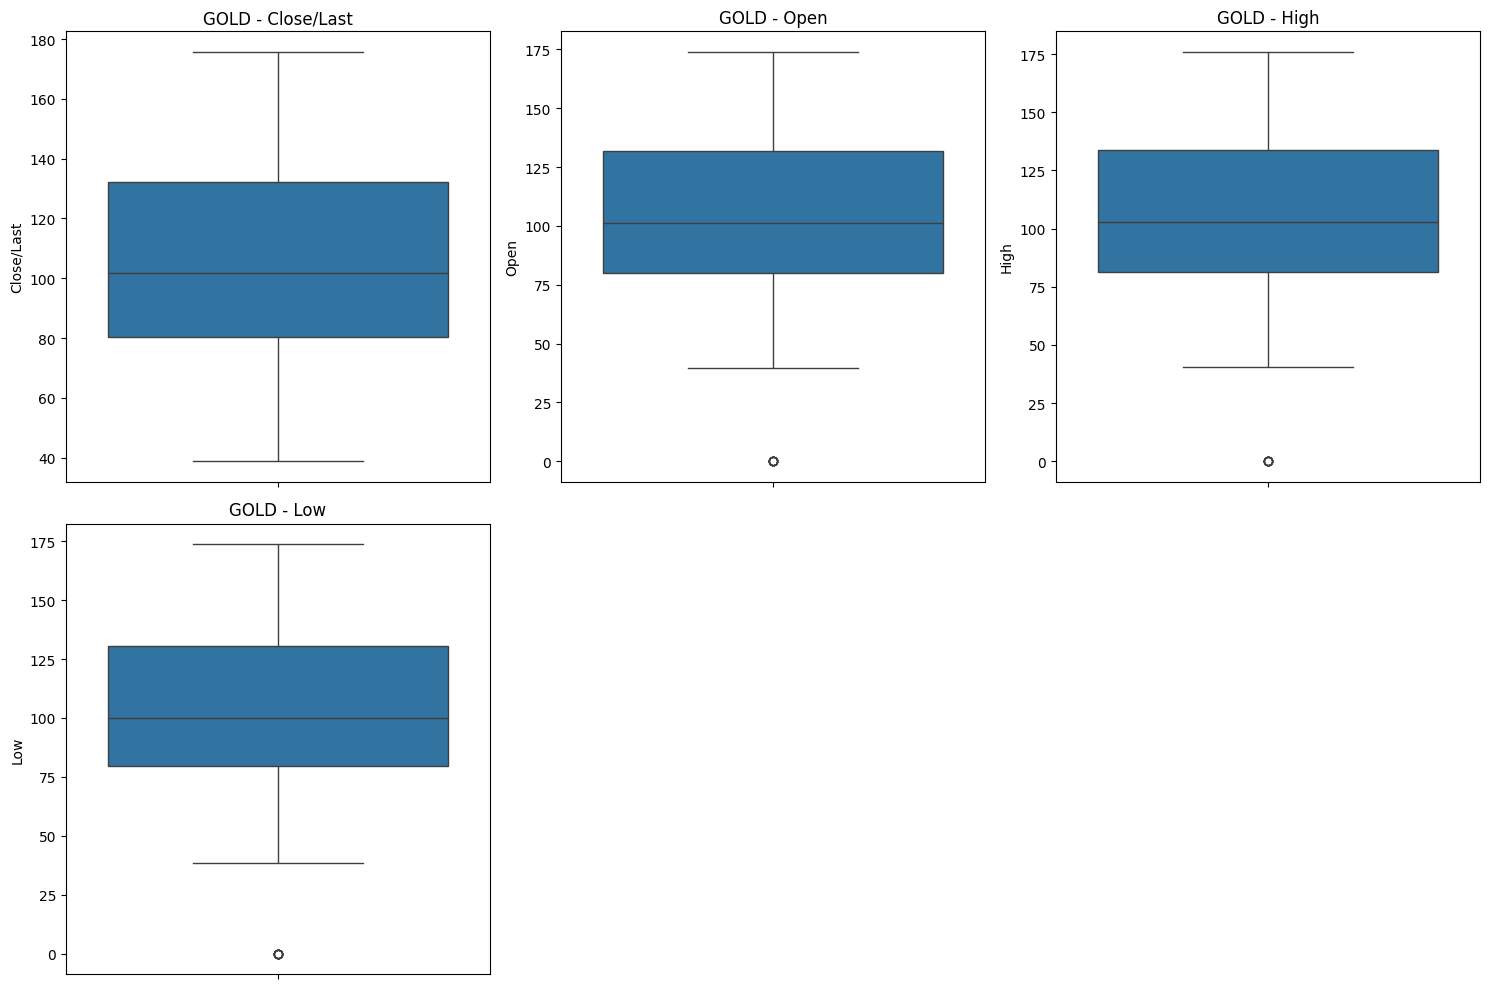

In [68]:
def plot_boxplots(df, asset_name):
    # Sélectionner les colonnes numériques
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Définir le nombre de subplots
    ncols = 3
    nrows = (len(numeric_cols) // ncols) + (1 if len(numeric_cols) % ncols else 0)
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
    axes = axes.flatten()  # Faciliter l'itération
    
    for i, col in enumerate(numeric_cols):
        # Supprimer les valeurs manquantes pour éviter les erreurs
        data = df[col].dropna()
        # Vérifier que la série n'est pas vide
        if data.empty:
            print(f"La colonne {col} est vide après suppression des NaN. Box plot ignoré.")
            continue
        
        # Optionnel : si la colonne ne contient qu'une seule valeur unique, avertir ou passer
        if data.nunique() == 1:
            print(f"La colonne {col} ne contient qu'une valeur unique. Box plot peut être peu informatif.")
        
        try:
            sns.boxplot(y=data, ax=axes[i])
            axes[i].set_title(f"{asset_name} - {col}")
            axes[i].set_ylabel(col)
        except ValueError as e:
            # En cas d'erreur, afficher un message et passer à la colonne suivante
            print(f"Erreur pour la colonne {col} : {e}")
    
    # Supprimer les axes inutilisés, s'il y en a
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation avec vos DataFrames déjà chargés et indexés sur 'Date'
# df_btc = pd.read_csv('btc.csv', parse_dates=['Date']).set_index('Date')
# df_sp500 = pd.read_csv('sp500.csv', parse_dates=['Date']).set_index('Date')
# df_gold = pd.read_csv('gold.csv', parse_dates=['Date']).set_index('Date')

plot_boxplots(df_btc, "BTC")
plot_boxplots(df_sp500, "S&P500")
plot_boxplots(df_gold, "GOLD")

In [73]:


# Charger les fichiers CSV avec conversion automatique des dates
df_btc = pd.read_csv("../CSV/BTC.csv", parse_dates=["Date"])
df_sp500 = pd.read_csv("../CSV/S&P500.csv", parse_dates=["Date"])
df_gold = pd.read_csv("../CSV/XAU(GOLD).csv", parse_dates=["Date"])

# Fonction pour calculer les rendements
def compute_returns(df, asset_name):
    df = df.copy()  # Éviter de modifier le DataFrame original
    df = df.dropna(subset=["Date"])  # Supprimer les dates nulles
    df = df.sort_values("Date").set_index("Date")  # Trier et définir l'index

    # Vérifier si la colonne de prix existe
    price_col = "Close/Last"
    if price_col not in df.columns:
        print(f"❌ Erreur : La colonne '{price_col}' n'existe pas dans {asset_name}.")
        print("🛠 Colonnes disponibles :", df.columns)
        return None, None, None, None  # Retourner None pour éviter des erreurs plus tard

    # Convertir les valeurs en numérique (au cas où elles soient au format texte)
    df[price_col] = df[price_col].replace('[\$,]', '', regex=True).astype(float)

    # Calcul des rendements
    df["Daily Return"] = df[price_col].pct_change()
    df["Monthly Return"] = df[price_col].resample('M').ffill().pct_change()
    df["Annual Return"] = df[price_col].resample('Y').ffill().pct_change()

    # Stocker les rendements moyens
    avg_daily = df["Daily Return"].mean()
    avg_monthly = df["Monthly Return"].mean()
    avg_annual = df["Annual Return"].mean()

    return df, avg_daily, avg_monthly, avg_annual

# Appliquer la fonction aux datasets
df_btc, btc_daily, btc_monthly, btc_annual = compute_returns(df_btc, "Bitcoin")
df_sp500, sp500_daily, sp500_monthly, sp500_annual = compute_returns(df_sp500, "S&P 500")
df_gold, gold_daily, gold_monthly, gold_annual = compute_returns(df_gold, "Gold")

# Affichage des résultats
print("\n📊 **Rendements moyens calculés :**")
print(f"🔹 Bitcoin (BTC) - Quotidien: {btc_daily:.4%}, Mensuel: {btc_monthly:.4%}, Annuel: {btc_annual:.4%}")
print(f"🔹 S&P 500 - Quotidien: {sp500_daily:.4%}, Mensuel: {sp500_monthly:.4%}, Annuel: {sp500_annual:.4%}")
print(f"🔹 Or (XAU/USD) - Quotidien: {gold_daily:.4%}, Mensuel: {gold_monthly:.4%}, Annuel: {gold_annual:.4%}")



📊 **Rendements moyens calculés :**
🔹 Bitcoin (BTC) - Quotidien: 0.2611%, Mensuel: 8.5970%, Annuel: 129.4423%
🔹 S&P 500 - Quotidien: 0.0487%, Mensuel: 0.9483%, Annuel: 17.8203%
🔹 Or (XAU/USD) - Quotidien: 0.0568%, Mensuel: 0.5229%, Annuel: 14.0080%


<>:20: SyntaxWarning: invalid escape sequence '\$'
<>:20: SyntaxWarning: invalid escape sequence '\$'
/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_9628/3435782343.py:20: SyntaxWarning: invalid escape sequence '\$'
  df[price_col] = df[price_col].replace('[\$,]', '', regex=True).astype(float)
/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_9628/3435782343.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["Monthly Return"] = df[price_col].resample('M').ffill().pct_change()
/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_9628/3435782343.py:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["Annual Return"] = df[price_col].resample('Y').ffill().pct_change()
/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_9628/3435782343.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  d

In [79]:

# Dictionnaire des actifs
assets = {"Bitcoin (BTC)": df_btc, "S&P 500": df_sp500, "Or (GOLD)": df_gold}
trading_days = 252  # Nombre de jours de trading par an

# Fonction pour nettoyer les données
def clean_data(df, asset_name):
    if 'Close/Last' not in df.columns:
        print(f"⚠️ La colonne 'Close/Last' est introuvable dans {asset_name} !")
        return None
    
    # Suppression des caractères spéciaux et conversion en float
    df['Close/Last'] = df['Close/Last'].replace('[\$,]', '', regex=True).astype(float)
    
    return df

# Fonction pour calculer la volatilité
def calculate_volatility(data, asset_name):
    if data is None:
        return
    
    data = data.dropna()  # Supprimer les valeurs manquantes
    data['Return'] = data['Close/Last'].pct_change()
    
    if data['Return'].isna().all():
        print(f"⚠️ Pas assez de données valides pour {asset_name} !")
        return

    volatility_daily = data['Return'].std()
    volatility_annual = volatility_daily * np.sqrt(trading_days)
    
    print(f"📌 {asset_name}")
    print(f"- Volatilité Quotidienne : {volatility_daily:.2%}")
    print(f"- Volatilité Annuelle : {volatility_annual:.2%}\n")

# Nettoyage et calcul des volatilités
for asset_name, df in assets.items():
    df_cleaned = clean_data(df, asset_name)
    calculate_volatility(df_cleaned, asset_name)

⚠️ Pas assez de données valides pour Bitcoin (BTC) !
📌 S&P 500
- Volatilité Quotidienne : 5.55%
- Volatilité Annuelle : 88.08%

📌 Or (GOLD)
- Volatilité Quotidienne : 27.47%
- Volatilité Annuelle : 436.05%



<>:12: SyntaxWarning: invalid escape sequence '\$'
<>:12: SyntaxWarning: invalid escape sequence '\$'
/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_9628/3993271320.py:12: SyntaxWarning: invalid escape sequence '\$'
  df['Close/Last'] = df['Close/Last'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_9628/3993271320.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Return'] = data['Close/Last'].pct_change()
/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_9628/3993271320.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [78]:
# Dictionnaire des actifs
assets = {"Bitcoin (BTC)": df_btc, "S&P 500": df_sp500, "Or (GOLD)": df_gold}
trading_days = 252  # Nombre de jours de trading par an

# Fonction pour calculer la volatilité
def calculate_volatility(data, asset_name):
    if 'Close/Last' not in data.columns:
        print(f"⚠️ La colonne 'Close/Last' est introuvable dans {asset_name} !")
        return
    
    data = data.dropna()  # Supprimer les valeurs manquantes
    data['Return'] = data['Close/Last'].pct_change()
    volatility_daily = data['Return'].std()
    volatility_annual = volatility_daily * np.sqrt(trading_days)
    
    print(f"📌 {asset_name}")
    print(f"- Volatilité Quotidienne : {volatility_daily:.2%}")
    print(f"- Volatilité Annuelle : {volatility_annual:.2%}\n")

# Calcul et affichage des volatilités
for asset_name, df in assets.items():
    calculate_volatility(df, asset_name)

📌 Bitcoin (BTC)
- Volatilité Quotidienne : nan%
- Volatilité Annuelle : nan%

📌 S&P 500
- Volatilité Quotidienne : 5.55%
- Volatilité Annuelle : 88.08%

📌 Or (GOLD)
- Volatilité Quotidienne : 27.47%
- Volatilité Annuelle : 436.05%



/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_9628/4042722325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Return'] = data['Close/Last'].pct_change()
/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_9628/4042722325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Return'] = data['Close/Last'].pct_change()
